## 1.Data Preparation 

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#load dataset
df = pd.read_csv("../data/Crop_recommendation.csv")

In [3]:
#melihat 5 baris data awal 
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
print(f'Peneliti mempunyai {df.shape[0]} baris dan {df.shape[1]} kolom')

Peneliti mempunyai 1697 baris dan 8 kolom


In [5]:
# membuat function untuk melihat informasi lebih mendalam
def inspect_dataframe(df):
    print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
    print(f"- {len(df.select_dtypes(include='number').columns)} are numeric cols")
    print(f"- {len(df.select_dtypes(include='O').columns)} are object cols")
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [6]:
inspect_dataframe(df)

The dataframe contains 1697 rows and 8 cols.
- 7 are numeric cols
- 1 are object cols


ColumnName  Nrow DataType  NAPct  DuplicatePct  UniqueValue  \
0            N  1697    int64    0.0          6.07          136   
1            P  1697    int64    0.0          6.07          117   
2            K  1697    int64    0.0          6.07           73   
3  temperature  1697  float64    0.0          6.07         1594   
4     humidity  1697  float64    0.0          6.07         1575   
5           ph  1697  float64    0.0          6.07         1564   
6     rainfall  1697  float64    0.0          6.07         1588   
7        label  1697   object    0.0          6.07           15   

                                              Sample  
0  [90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...  
1  [42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...  
2  [43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...  
3  [20.87974371, 21.77046169, 23.00445915, 26.491...  
4  [82.00274423, 80.31964408, 82.3207629, 80.1583...  
5  [6.502985292, 7.038096361, 7.840207144, 6.9804...  
6  [202.9355362, 226.6555374, 263.9642476, 242.86...  
7  [rice, maize, Soyabeans, beans, peas, groundnu...

1. pada dataset mempunyai 3 kolom bertipe int, 4 kolom float dan 1 object.
2. sejauh ini data yang kita punya sesuai dengan type masing-masing data inputnya.
3. terdapat indikasi bahwa ada sekitar 6% data duplicated.

In [7]:
display(df.describe(), df.describe(include='object'))

N            P            K  temperature     humidity  \
count  1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean     52.647024    58.126105    52.031232    24.711674    65.848856   
std      38.536964    34.164342    57.068796     4.910428    24.432640   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    36.000000    19.000000    21.631491    51.278688   
50%      37.000000    54.000000    27.000000    24.910323    77.906210   
75%      90.000000    72.000000    52.000000    27.834871    83.856427   
max     140.000000   145.000000   205.000000    41.948657    94.964199   

                ph     rainfall  
count  1697.000000  1697.000000  
mean      6.438962    99.364935  
std       0.870411    50.436396  
min       3.504752     5.314507  
25%       5.861399    66.838723  
50%       6.354007    93.123306  
75%       6.932537   115.356032  
max       9.935091   298.560117

label
count   1697
unique    15
top     rice
freq     139

1. peneliti melihat adanya data yang rangenya sangat lebar pada kolom N,P dan K.
2. peneliti melihat pada kolom N dengan nilai minim 0 apakah ini data yang valid atau tidak akan saya telusuri lebih lanjut.

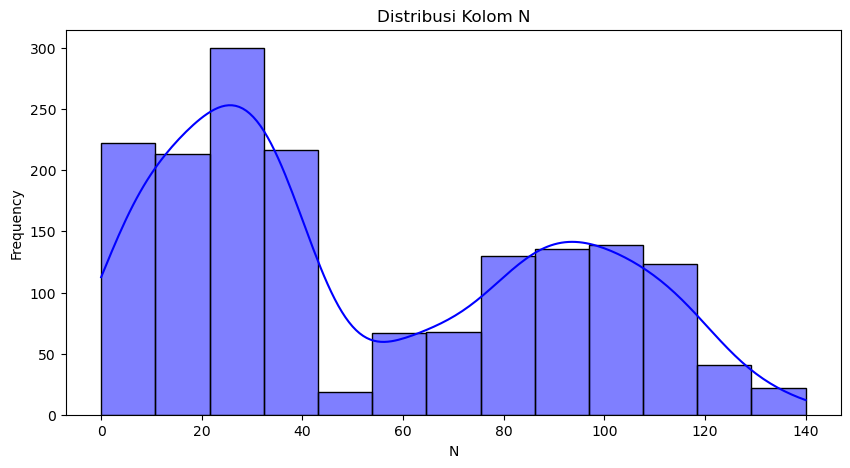

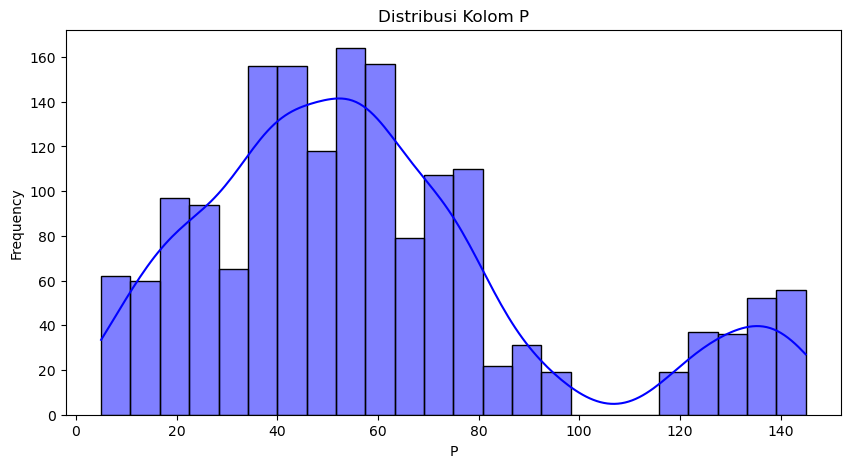

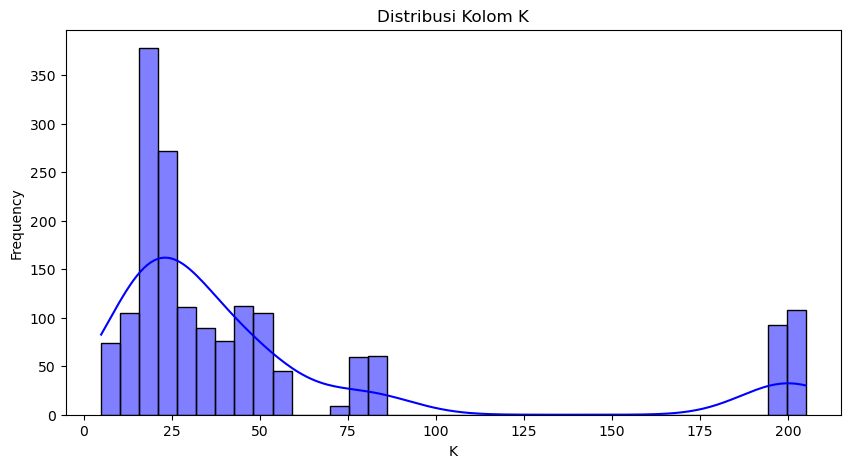

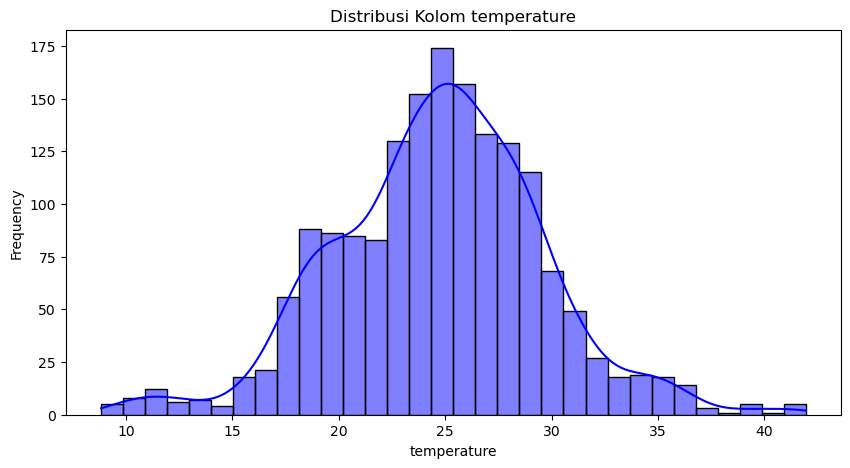

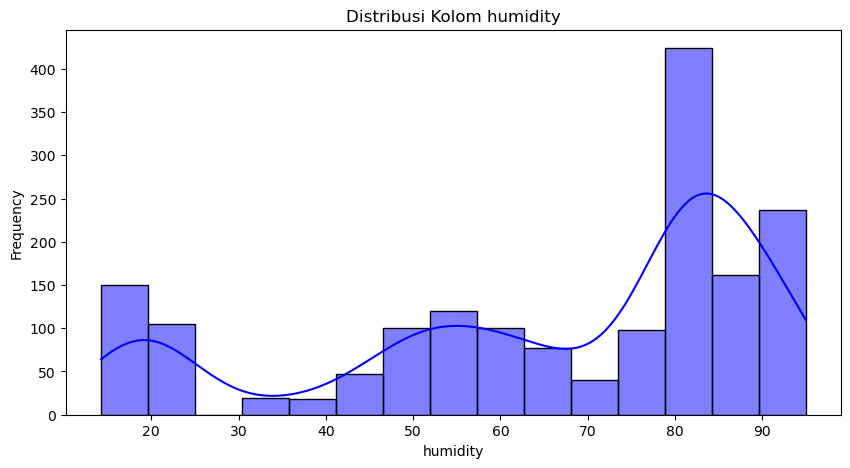

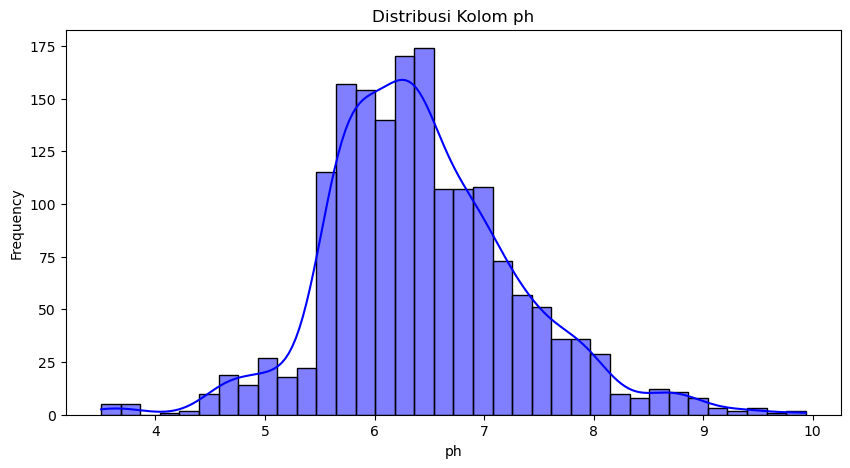

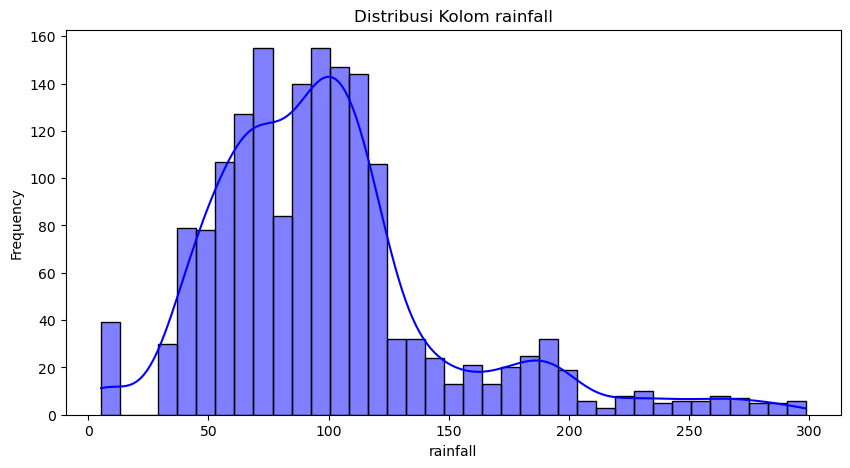

In [8]:
# Plot distribusi data untuk setiap kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribusi Kolom {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

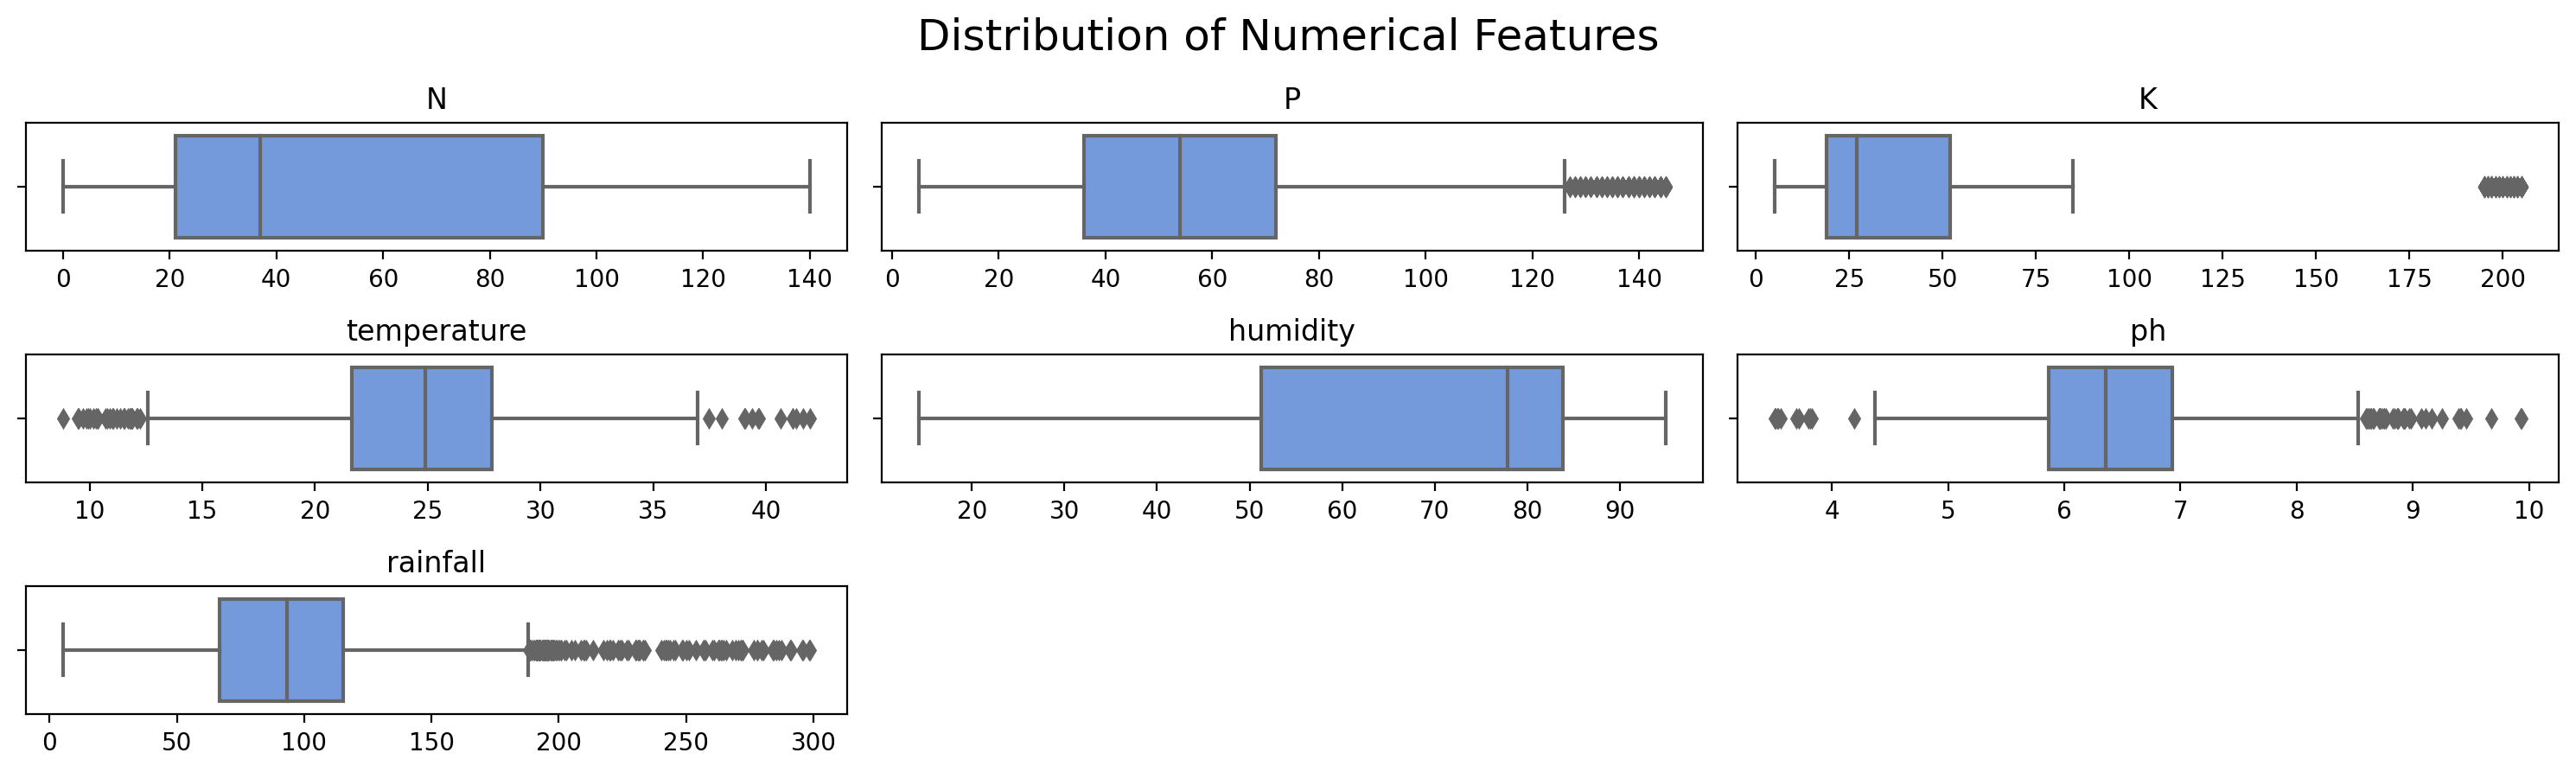

In [9]:
# define kolom yang bertujuan melihat distribusi dari masing-masing kolom numeric
numerical_columns = df.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7), dpi=200)
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[col], color='cornflowerblue', orient='v')
    plt.title(f'{col}')
    plt.xlabel(None)

plt.tight_layout()
plt.show()

1. pada kolom N tidak ada data yang outlier tetapi dri boxplotnya mungkin terindikasi dia right skewed.
2. pada kolom P terdapat nilai outlier yang banyak.
3. pada kolom K ini terdapat beberapa nilai yang sangat tinggi.
4. pada kolom temparatur mungkin ini wajar dikarenakan bisa saja temparatur sangat berubah ubah pada suatu kondisi tertentu.
5. pada kolom humidity tidak terdapat outliyer yang tinggi tapi dariboxplotnya mungin ini ada indikasi left skewed.
6. pada kolom ph  dan rainfall juga terdapat outlier.

### 1.Cek Missing value

In [10]:
# cek missing value
df.isna().sum().to_frame().reset_index().rename(columns={"index":"column_name", 0:"value"})

column_name  value
0            N      0
1            P      0
2            K      0
3  temperature      0
4     humidity      0
5           ph      0
6     rainfall      0
7        label      0

pada kasus kali ini dataset tidak memiliki data yang null.

### 2.Cek Duplicated

In [11]:
#cek duplicated 
df[df.duplicated()]

N   P   K  temperature   humidity        ph    rainfall    label
1594    2  47  15    29.868601  85.991279  6.401456   58.413941  cowpeas
1595   20  45  22    29.588816  89.993969  6.904587   54.961213  cowpeas
1596    2  39  15    28.072196  82.911647  6.478557   49.618653  cowpeas
1597   27  40  24    27.840265  89.996156  7.063022   52.846260  cowpeas
1598   35  48  15    27.108181  87.451267  6.981758   55.037240  cowpeas
...   ...  ..  ..          ...        ...       ...         ...      ...
1692  117  86  48    28.695620  82.541958  6.225225  116.161684   banana
1693  114  94  53    26.335449  76.853201  6.190757  118.685826   banana
1694  110  78  50    25.937302  78.898644  5.915569   98.217475   banana
1695   94  70  48    25.136865  84.883944  6.195152   91.464425   banana
1696   80  71  47    27.505277  80.797840  6.156373  105.077699   banana

[103 rows x 8 columns]

pada dataset mempunyai data duplicated sebanyak 103 baris, langkah kedepanya peneliti akan menghapus data duplicated ini.

In [12]:
#kita ambil data yang pertama pada data duplicated
df = df.drop_duplicates(keep='first')

In [13]:
display(df.head(len(df)), df[df.duplicated()])

N   P   K  temperature   humidity        ph    rainfall      label
0     90  42  43    20.879744  82.002744  6.502985  202.935536       rice
1     85  58  41    21.770462  80.319644  7.038096  226.655537       rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248       rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034       rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340       rice
...   ..  ..  ..          ...        ...       ...         ...        ...
1589  22  67  78    17.366064  14.724575  6.204091   73.326675  Soyabeans
1590  36  65  80    18.487201  16.979216  6.051091   75.874456  Soyabeans
1591  59  60  84    19.230253  18.967256  7.690962   95.709920  Soyabeans
1592  54  77  85    17.341861  17.366243  7.829211   84.746067  Soyabeans
1593  43  68  81    17.678094  18.232540  6.761600   79.920602  Soyabeans

[1594 rows x 8 columns]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

### 3.Cek Outlier

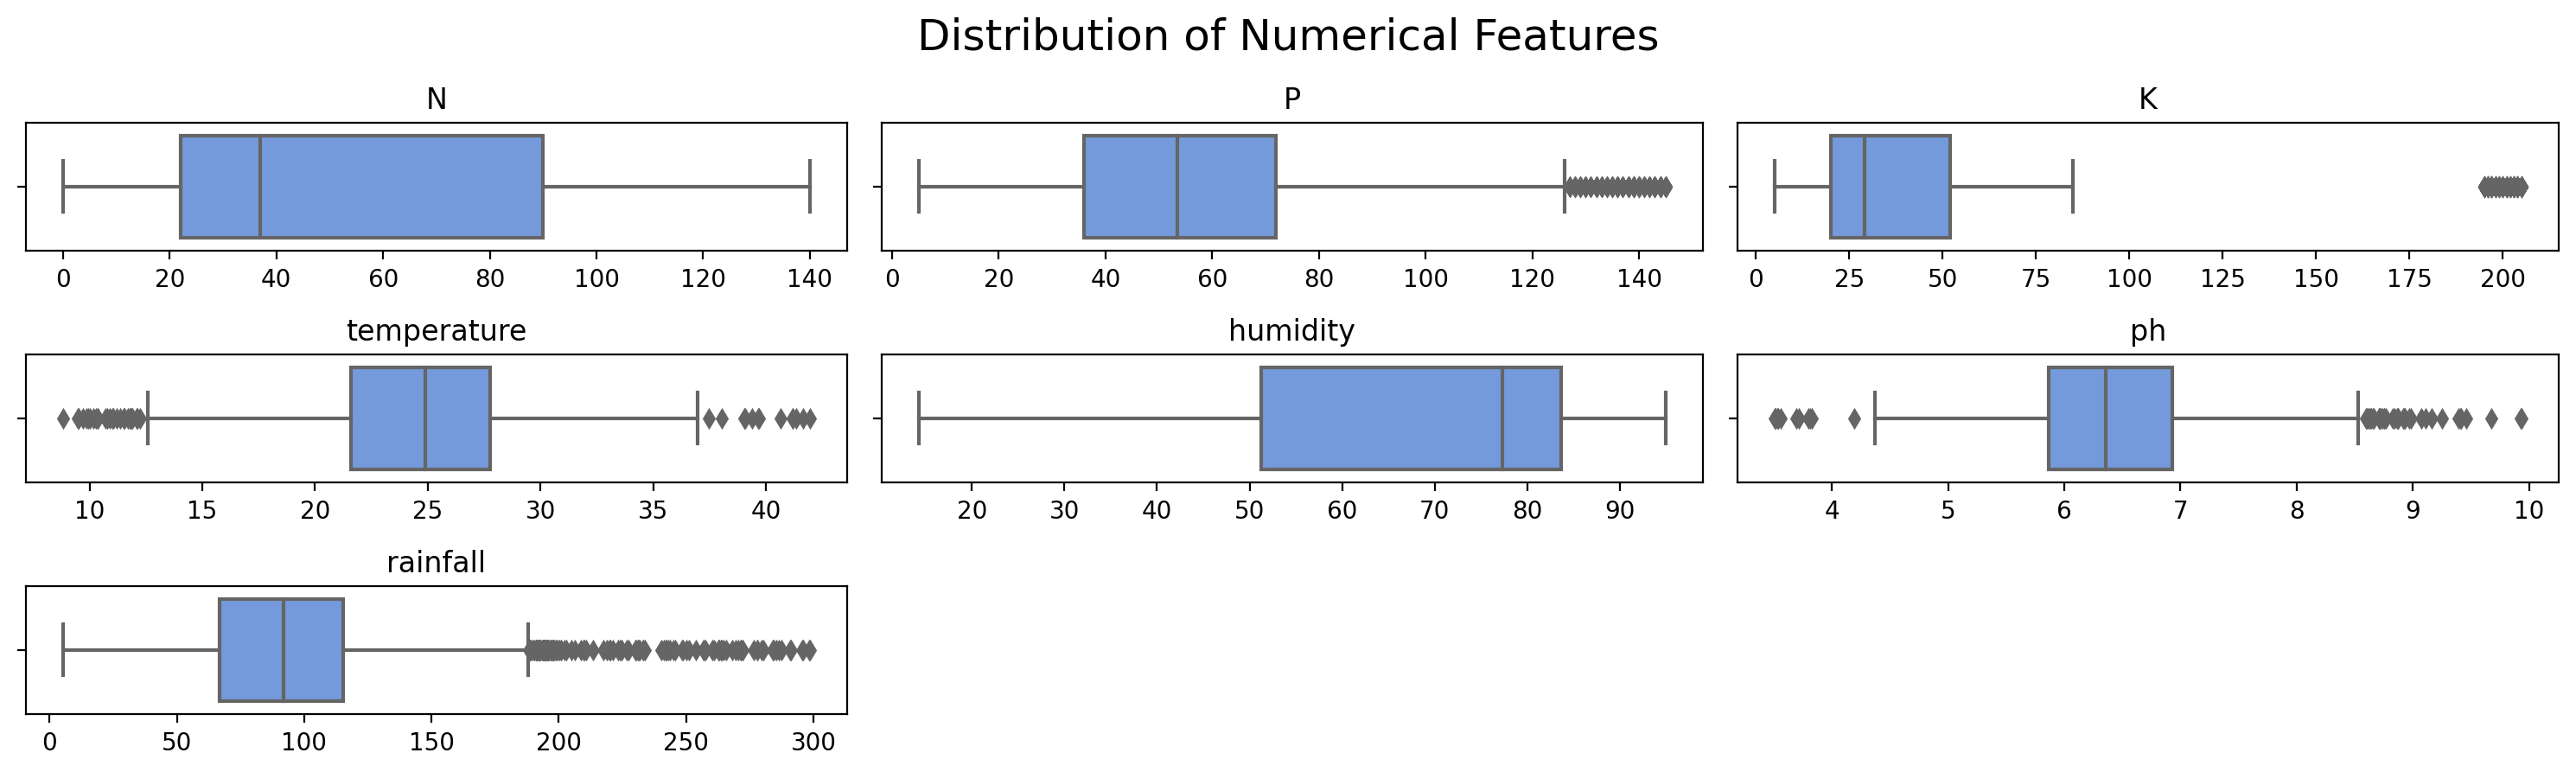

In [14]:
# define kolom yang bertujuan melihat distribusi dari masing-masing kolom numeric
numerical_columns = df.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7), dpi=200)
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[col], color='cornflowerblue', orient='v')
    plt.title(f'{col}')
    plt.xlabel(None)

plt.tight_layout()
plt.show()

In [15]:
# Identifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop untuk mengecek outlier di setiap kolom numerik
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar-kuartil
    
    lower = Q1 - 1.5 * IQR  # Batas bawah
    upper = Q3 + 1.5 * IQR  # Batas atas
    
    # Identifikasi nilai outlier
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Kolom: {column}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column]])  # Menampilkan data outlier untuk kolom tersebut
    print("-" * 50)

Kolom: N
Jumlah outlier: 0
Empty DataFrame
Columns: [N]
Index: []
--------------------------------------------------
Kolom: P
Jumlah outlier: 147
        P
900   130
901   144
904   131
906   140
909   134
...   ...
1194  145
1196  132
1197  137
1198  144
1199  140

[147 rows x 1 columns]
--------------------------------------------------
Kolom: K
Jumlah outlier: 200
        K
900   195
901   204
902   205
903   196
904   196
...   ...
1195  197
1196  198
1197  196
1198  196
1199  197

[200 rows x 1 columns]
--------------------------------------------------
Kolom: temperature
Jumlah outlier: 41
      temperature
903     37.465668
905     39.648519
907     12.141907
909     39.040720
910     39.707722
911      9.467960
914      8.825675
916     11.021054
925     12.087022
928     38.060995
929     39.065555
934     10.898759
939     11.797647
940     11.363009
947     41.186649
950     10.380048
954     10.723025
959     41.207336
962     40.660123
963     11.827682
969     39.371026
9

1. peneliti mendapatkan beberapa kolom yang memiliki banyak outlier tetapi hall ini wajar karna unsur tanah yang alami memang memiliki unser yang berbeda.
2. peneliti tidak akan melakukan drop atau penghapusan data outlier ini dikarenakan data yang diberikan sangat penting.

## 2.Exploratory Data Analysis(EDA)

### 1.Univariate analyst

In [16]:
df.head(100)

N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
..  ..  ..  ..          ...        ...       ...         ...   ...
95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice
96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice
97  60  55  45    21.408658  83.329319  5.935745  287.576693  rice
98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice
99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 8 columns]

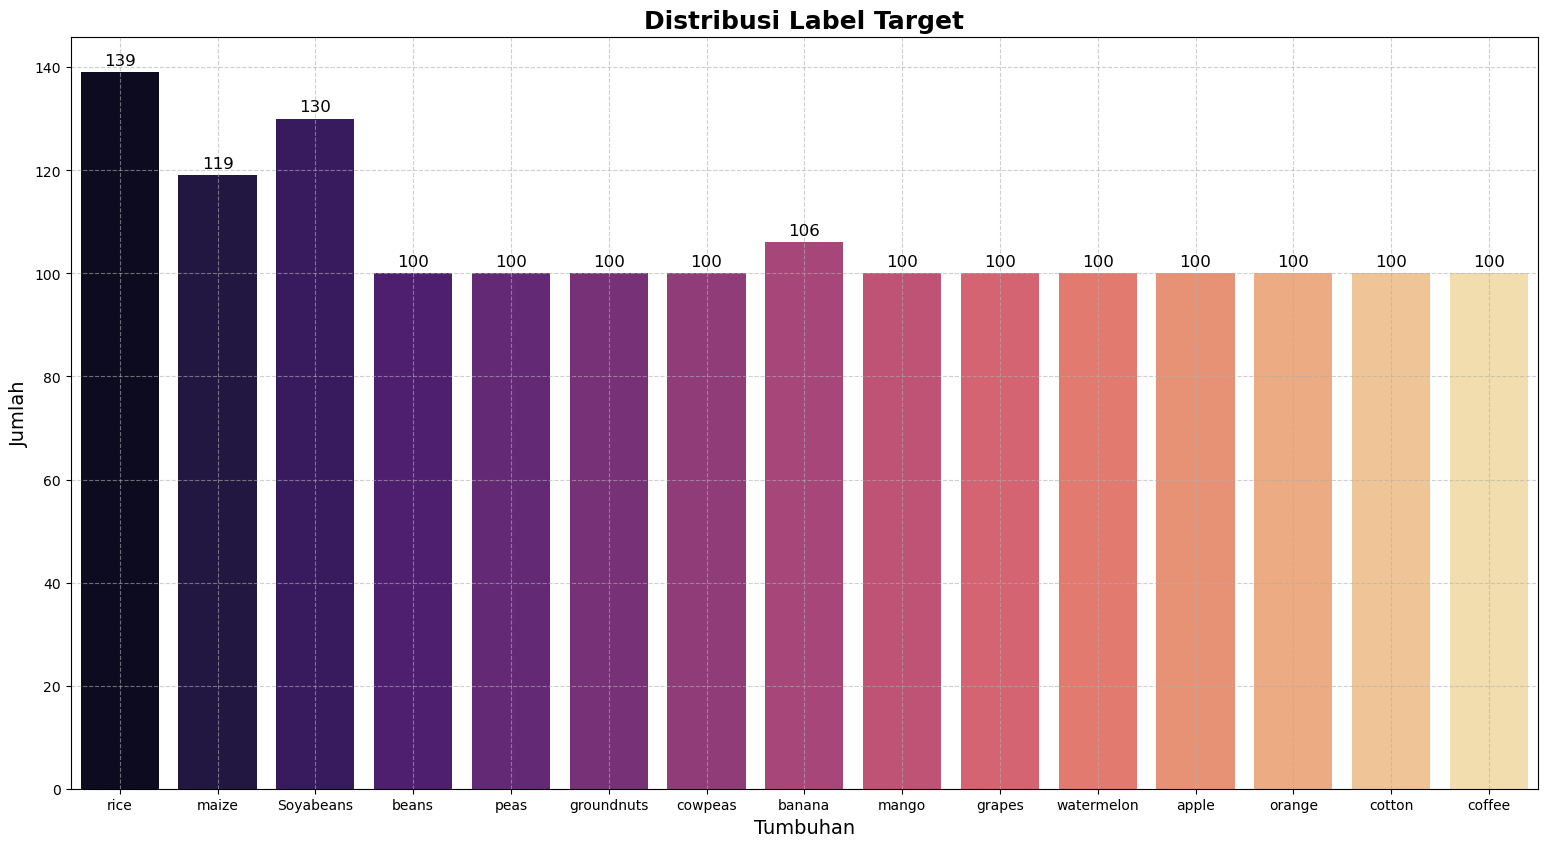

In [17]:
# Visualisasi data
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x="label", palette="magma")

# Tambahkan angka di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Tambahkan judul dan label
plt.title("Distribusi Label Target", fontsize=18, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)

# Tata letak agar tidak berantakan
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(pad=-1)
plt.show()

1. Bisa kita lihat pada dataset distiribusi dari semua kelas label bisa dibilang imbang rangenya tidak terlalu jauh tau imbalance.
2. Bisa dilihat juga kelas yang mendominasi yaitu kelas rise, soyabens dan maize yang lain sama.

#### 2.Bivariate Analyst

##### 1. Target dengan Nitrogen(N)

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\4032501253.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='N', palette="husl", alpha=0.7)


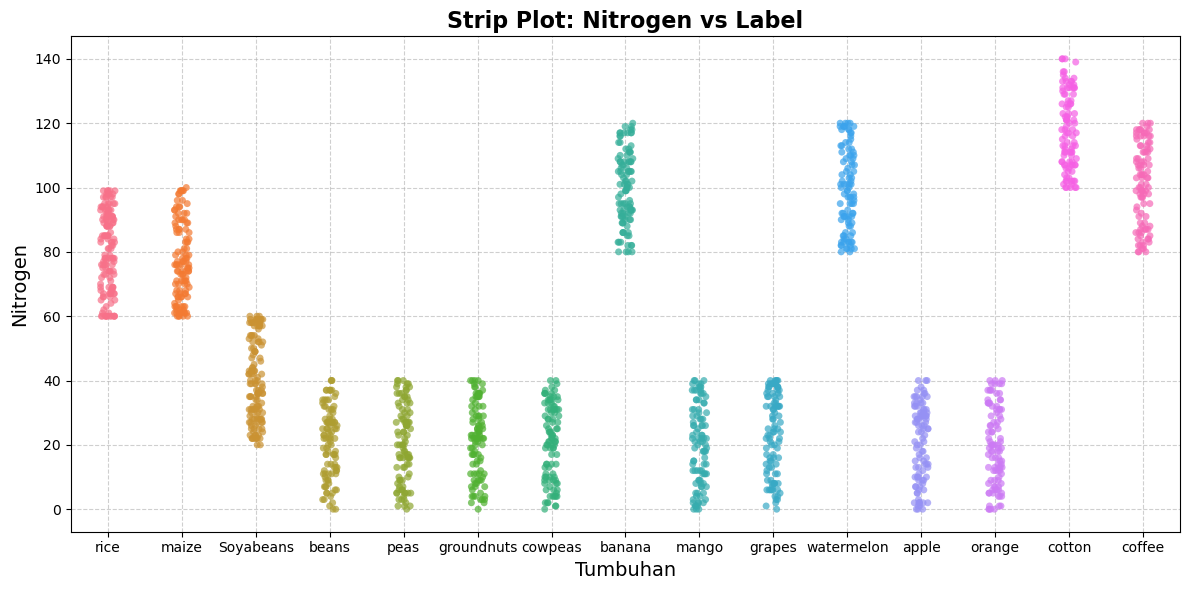

In [18]:
#plot kolom Nitrogen dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='N', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Nitrogen vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Nitrogen', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada visualisasi diatas kita dapat informasi tentang tumbuhan dengan rata-rata unsur nitrogen pada range 0 sampai 40 dengan tumbuhan tertentu, ada juga yang nilai nitrogenya tinggi seperti cotton dan coffe yang berada disekitaran 100 sampai 140 sedangakan coffe 80 samapai 120 dan masih ada banana dan watermelon yanbg berada pada 80 hingga 120.

##### 2. Target dengan Fosfor(P)

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\3889444393.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='P', palette="husl", alpha=0.7)


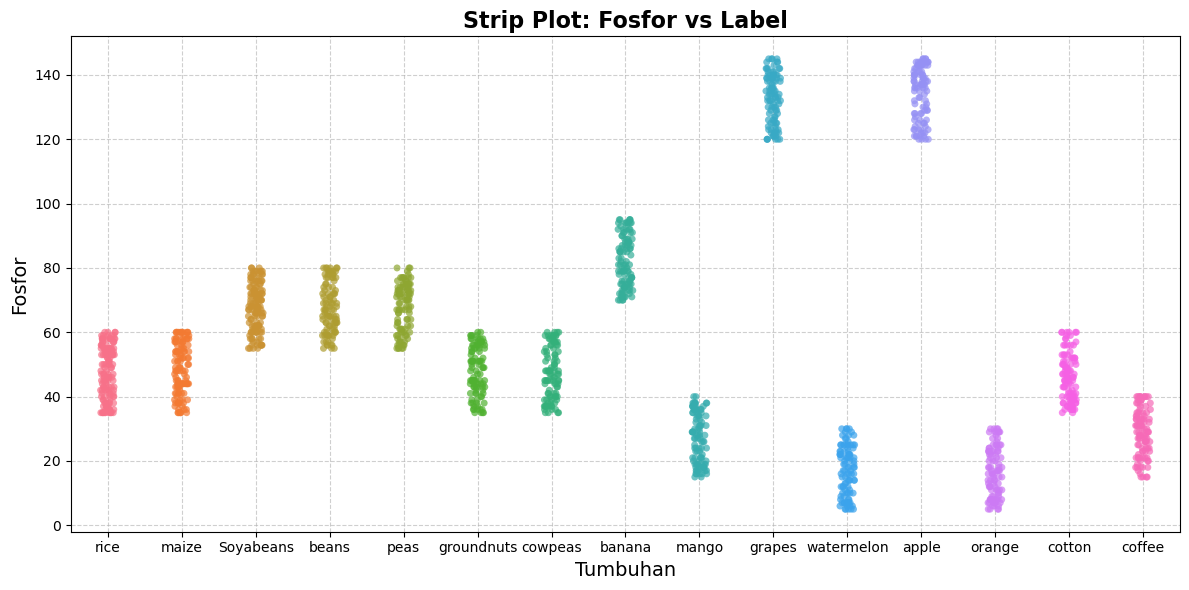

In [19]:
#plot kolom fosfor dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='P', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Fosfor vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Fosfor', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas bahwa kita dapat informasi bahwa kadar fosfor untuk setiap tumbuhan itu berbeda, ada yang kebutuhan fosfornya begitu tinggi dari pada yang lainya yaitu tumbuhan grapes dan apple disekitaran 120 hingga 145.

##### 3. Target dengan Kalium(K)

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\2981381796.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='K', palette="husl", alpha=0.7)


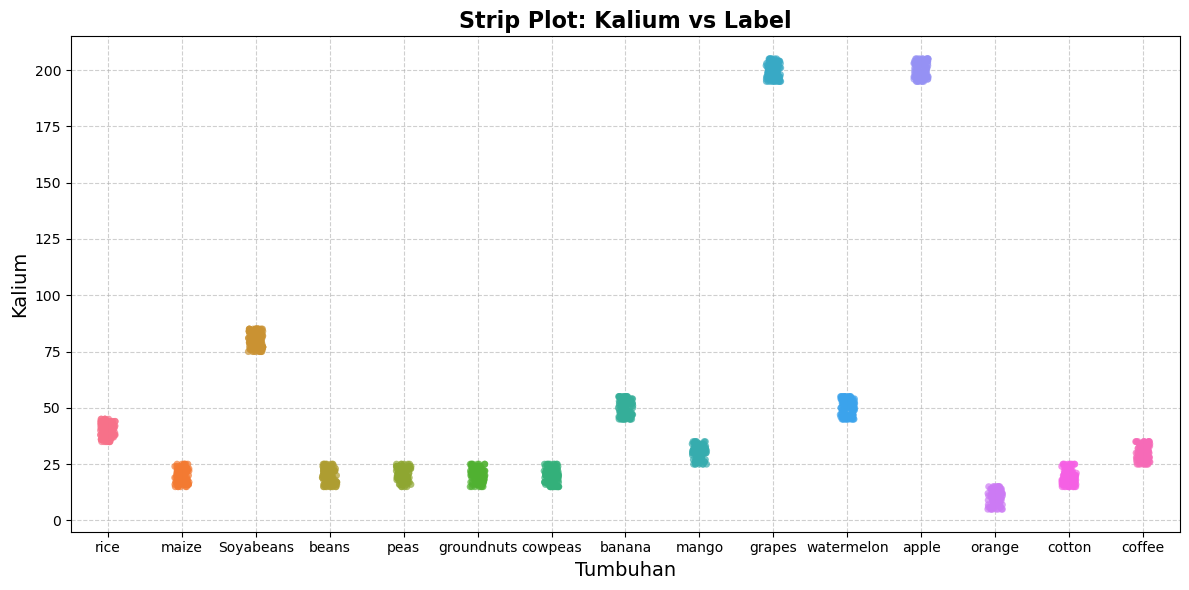

In [20]:
#plot kolom fosfor dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='K', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Kalium vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Kalium', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas kita dapat informasi bahwa grape dan apple itu membutuhkan nilai kalium yang tinggi dibandingakan dengan yang lainya yaitu sekitar 200 lebih.

##### 4. Target dengan Temparature

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\3806006082.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='temperature', palette="husl", alpha=0.7)


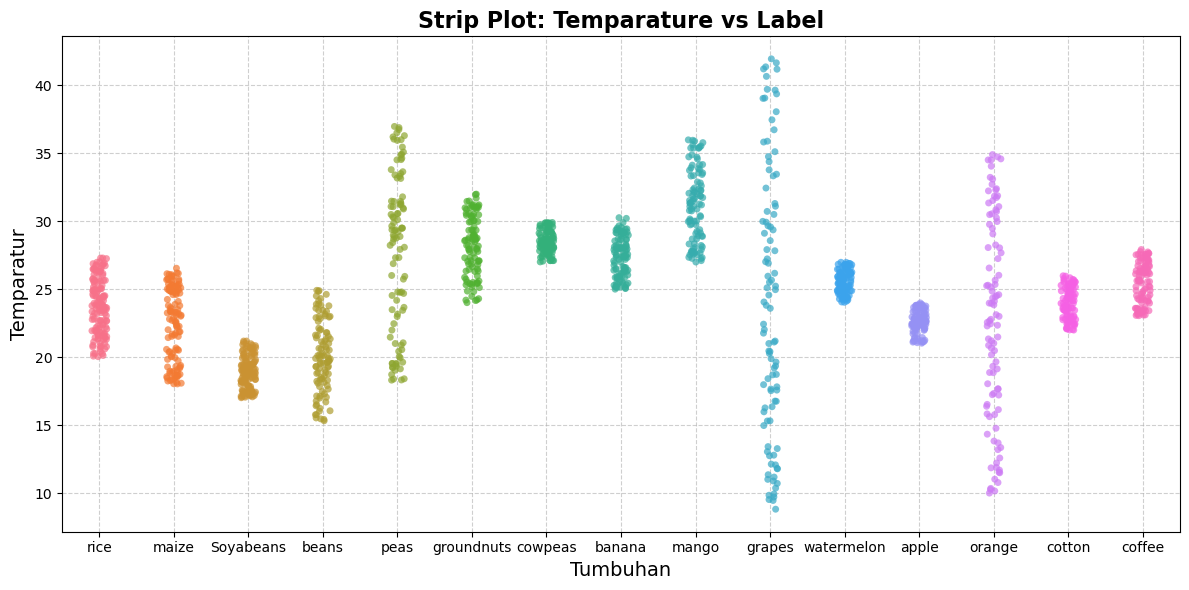

In [21]:
#plot kolom fosfor dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='temperature', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Temparature vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Temparatur', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas kita dapat informasi bahwasanya grape dan orange memiliki range temparature yang sangat rendah tapi bisa juga sangat extrem diangka 10 hingga 40.

##### 5. Target dengan Humidity

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\2856262626.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='humidity', palette="husl", alpha=0.7)


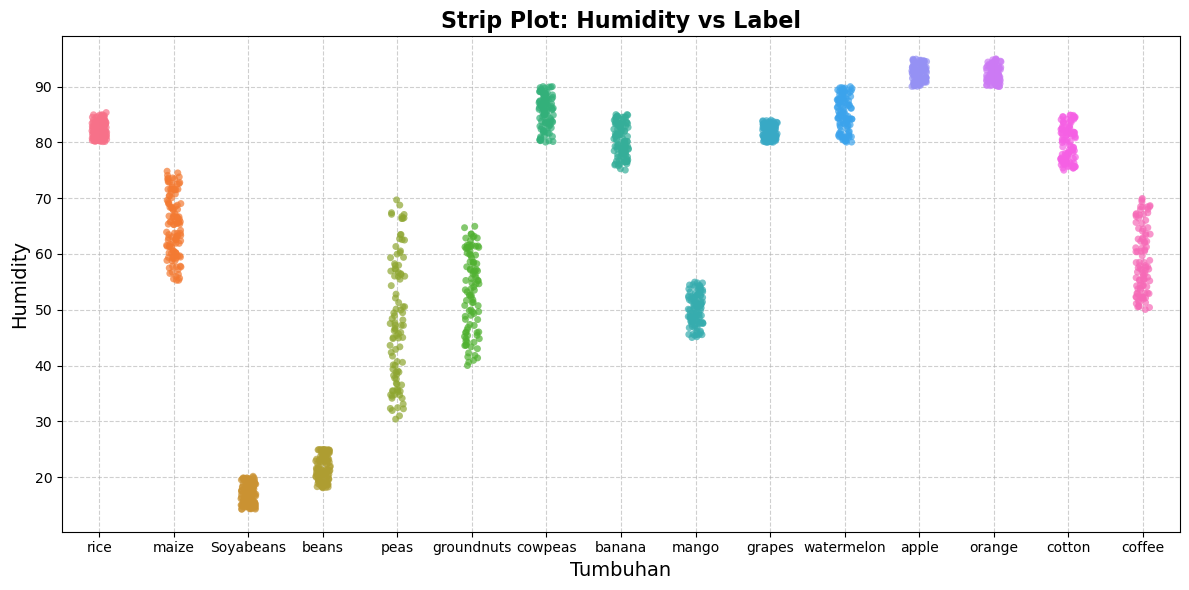

In [22]:
#plot kolom humidity dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='humidity', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Humidity vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas kita dapat informasi bahwa setiap tumbuhan memiliki tingkat kelembapanya masing-masing pada tumbuhan seperti rice dan grape memiliki range yang kecil yang dimana tumbuhan ini hanya akan maksimal bertumbuh pada kelembapan 80-88.

##### 6. Target dengan Ph

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\4152804465.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='ph', palette="husl", alpha=0.7)


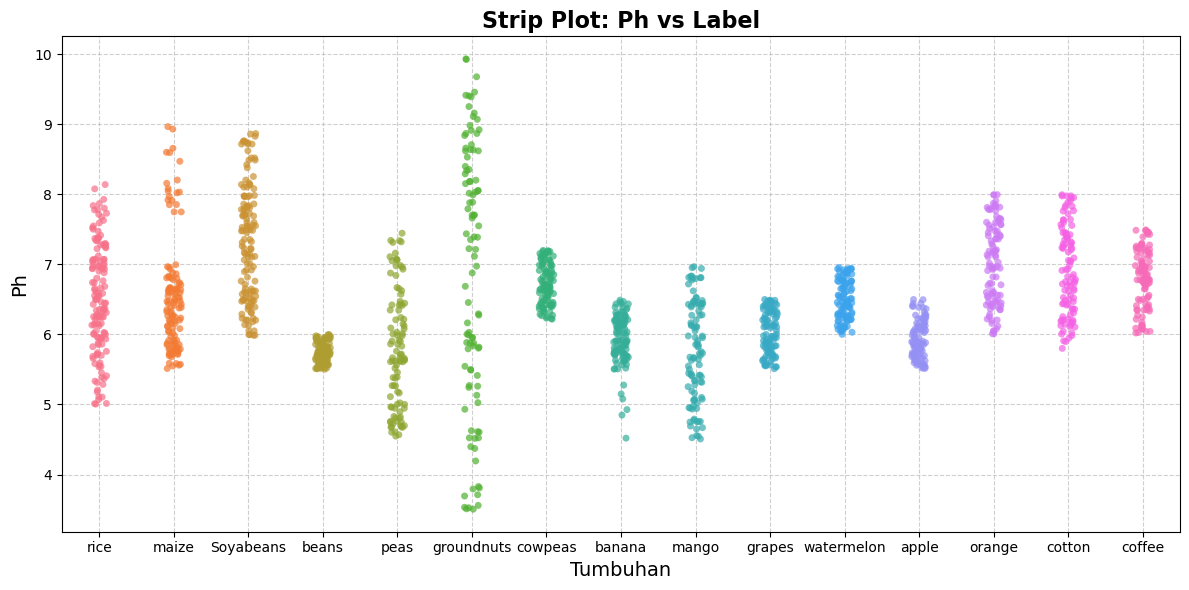

In [23]:
#plot kolom humidity dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='ph', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Ph vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Ph', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas kita dapat informasi bahwa yang meiliki ph tinggi yaitu groundnuts yang dimana kita ketahui ph semakin tinggi akan semakin asam, teruntuk tumubhan lain masih pada disekitran 6 dampai 8.

##### 7. Target dengan Rainfall

C:\Users\Tofik\AppData\Local\Temp\ipykernel_15584\3682320065.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x="label", y='rainfall', palette="husl", alpha=0.7)


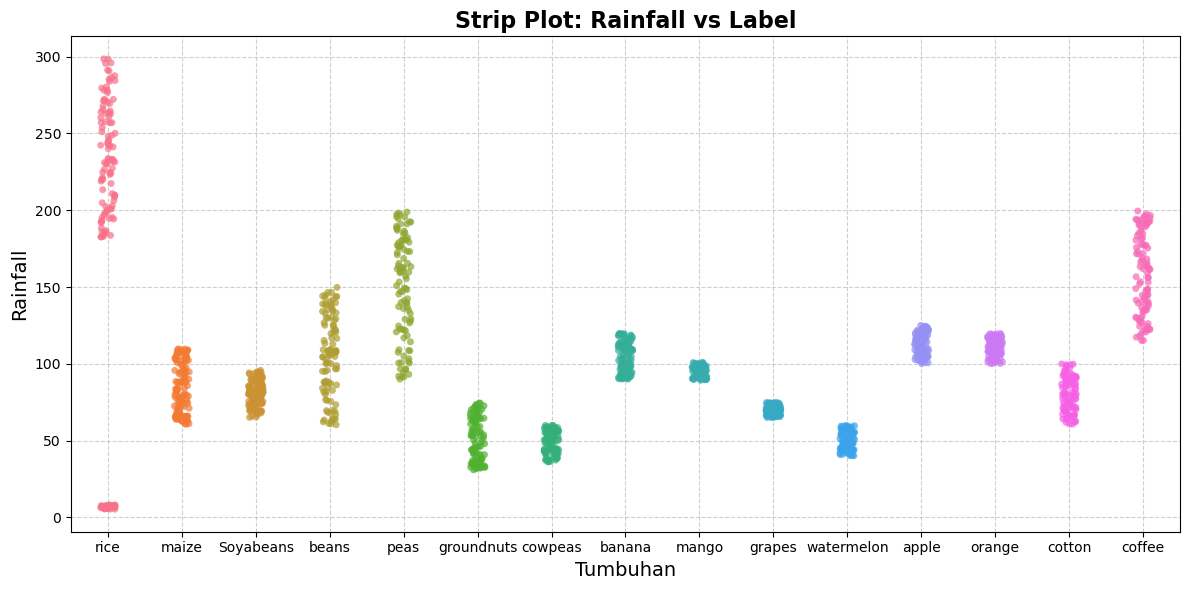

In [24]:
#plot kolom humidity dengan target
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="label", y='rainfall', palette="husl", alpha=0.7)
plt.title(f"Strip Plot: Rainfall vs Label", fontsize=16, weight='bold')
plt.xlabel("Tumbuhan", fontsize=14)
plt.ylabel('Rainfall', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pada hasil visualisasi diatas ternyata untuk tumbuhan rice memiliki curah hujan yanjg sangat tinggi untuk mendapatkan hasil panen yang maksimal, tapi terkadang juga memiliki curah hujan yang kecil, hall ini terjadi karena faktor dari peralihan musim hujan ke panas.

### Insight keseluruhan
1. Pada kebutuhan rata-rata kebutuhan nitrogen pada tumbuhan yaitu sekitar 20-200ppm (sumber chat-gpt4) yang dimana kita lihat pada dataset yang kita punya memang pada range tersebut.
2. Pada kebutuhan fosfor rata-rata penggunaan pada tumbuhan sekitar 10-80ppm (sumber chst-gpt) yang dimana didataset kita mempunya nilai tumbuhan dengan nilai fosfor yang tinggi yaitu pada tumbuhan grape dan apple.
3. Pada kebutuhan kalium rata-rata penggunaan pada tumbuhan sekitar 50-300 ppm (sumber chat-gpt) yang dimana pada dataset kitamasih banyak tumbuhan yang dibawah standar kalium bagi tumbuhan.
4. Pada kebutuhan ph tanah yang baik ada pada sekitaran 6-7 dimana ketika ph semakin tinggi maka tinggkat keasaaman dari tanah akan semakin tinggi.
5. Pada kebutuhan temparature ada beberapa tumbuhan yang memiliki temparature yang tinggi diatas 30 diantaranya grapes, orange, peas dan manggo.
6. pada kebutuhan humidity pada tumbuhan yang kelembabanya lebih dari 90% yaitu apple dan orange.
7. sedangkan tumbuhan dengan rainfall yang tinggi dibutuhkan oleh tumbuhan rice diangka sekitaran 200-300.

#### 3.Multivariate Analyst

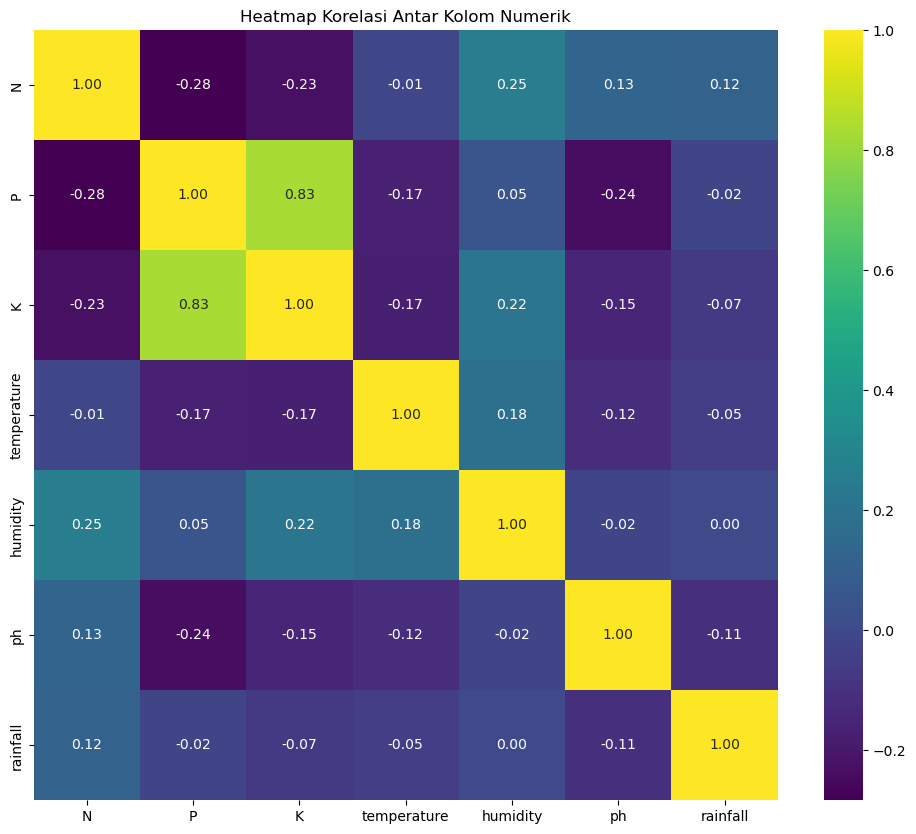

In [25]:
# Heatmap korelasi untuk kolom numerik
correlation = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Heatmap Korelasi Antar Kolom Numerik")
plt.show()

1. Pada hasil visualisasi diatas dilihat, antara Fosfor(P) dan Kalium(K) memiliki hubungan relasi positif yang kuat sekitar 0.83 atau kata lain ketika nilai dari P naik maka variabel K juga naik sebaliknya juga, mungkin bisa saja ketika kebutuhan fosfor dari suatu tumbuhan maka kita juga akan menaikan nilai dari kaliumnya juga.
2. Di kenaikan tingkat kalium juga dipengaruhi oleh tingkat humidity yang sekitar 0.22 yang dimana ini korelasi positive.
3. Berbanding kebalik bagi tingkat Ph yang memiliki korelasi negative sekitaran -0.24 yang artinya ketika Ph semakin tinggi maka tingkat fosfornya semkain dikurangi ataupun sebaliknya.

In [26]:
#save dataset yang sudah dicleaning
df.to_csv('../data/dataset_cleaned.csv', index=False)

## 3.Feature Engineering

### 1.Data Spliting

In [27]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import joblib

Peneliti melakukan import library yang dibutuhkan

In [28]:
df_new = df.copy()

In [29]:
df_new

N   P   K  temperature   humidity        ph    rainfall      label
0     90  42  43    20.879744  82.002744  6.502985  202.935536       rice
1     85  58  41    21.770462  80.319644  7.038096  226.655537       rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248       rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034       rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340       rice
...   ..  ..  ..          ...        ...       ...         ...        ...
1589  22  67  78    17.366064  14.724575  6.204091   73.326675  Soyabeans
1590  36  65  80    18.487201  16.979216  6.051091   75.874456  Soyabeans
1591  59  60  84    19.230253  18.967256  7.690962   95.709920  Soyabeans
1592  54  77  85    17.341861  17.366243  7.829211   84.746067  Soyabeans
1593  43  68  81    17.678094  18.232540  6.761600   79.920602  Soyabeans

[1594 rows x 8 columns]

In [30]:
X = df_new.drop(['label'], axis=1)
y = df_new['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1275, 7), (319, 7), (1275,), (319,))

Peneliti melakukan spliting data dengan proporsi 80% sebagai train dan 20% sebagai test.

In [32]:
numerical_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [33]:
#membuat pipeline untuk tipe Categorical
cat_pipeline = Pipeline([
    ("inpute", SimpleImputer(strategy='most_frequent')),
    ('one-hot' , OneHotEncoder(handle_unknown='ignore', sparse_output= False))
])

#membuat pipeline untuk Numerical
num_pipeline = Pipeline([
    ("inpute", SimpleImputer(strategy='median')),
    ('scaling' , RobustScaler())
])

In [34]:
col_tranform = ColumnTransformer([
    ('cat_transform',cat_pipeline, categorical_cols),
    ('num_transform',num_pipeline, numerical_cols)
], remainder = 'passthrough', n_jobs= -1)

Peneliti membangun sebuah pipeline untuk mempermudahkan data yang diproses karena kedepanya saya melakukan uji coba beberapa model algortima yang berbeda.

## 4.Modeling

### 1.KNN

In [35]:
model_knn = KNeighborsClassifier(n_neighbors = 5)

In [36]:
final_pipeline_knn = make_pipeline(col_tranform, model_knn)

In [37]:
final_pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('num_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [38]:
# Evaluasi pada data latih
y_train_pred = final_pipeline_knn.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Evaluasi pada data uji
y_test_pred = final_pipeline_knn.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print hasil F1 Score
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Analisis Overfitting/Underfitting
if train_f1 > test_f1 + 0.1:
    print("Model kemungkinan overfitting.")
elif train_f1 < 0.7 and test_f1 < 0.7:
    print("Model kemungkinan underfitting.")
else:
    print("Model memiliki generalisasi yang baik.")


Train F1 Score: 1.00
Test F1 Score: 0.98
Model memiliki generalisasi yang baik.


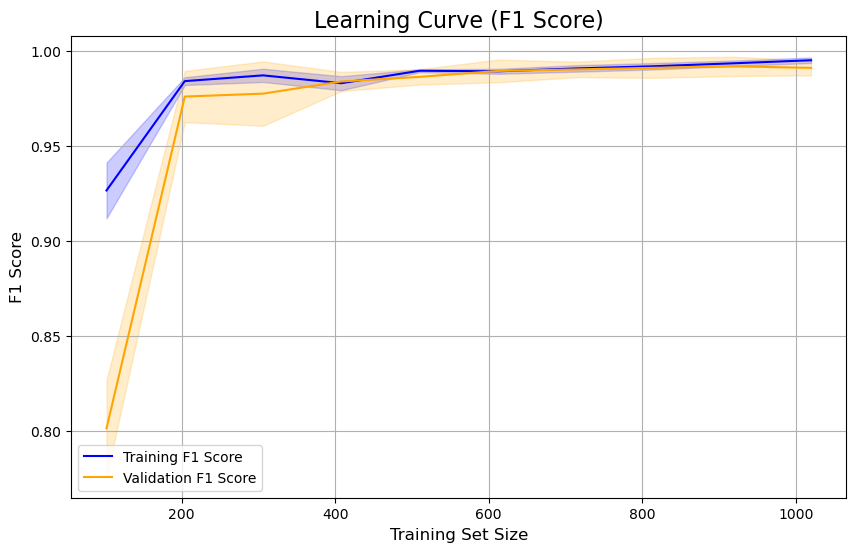

In [39]:
# Learning curve dengan F1 Score
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline_knn, X_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata dan standar deviasi
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1 Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation F1 Score', color='orange')

# Error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Labels and Title
plt.title('Learning Curve (F1 Score)', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

Pertama saya menggunakan algoritma KNN untuk menguji sebuah mechine, alhasil yang saya dapatkan yaitu sebagai visualisasi diatas yaitu dengan nilai F1-score 100% untuk training dan test sebesar 98%.

### 2.Logistic Regression

In [40]:
model_logistic = LogisticRegression()

In [41]:
final_pipeline_logistic = make_pipeline(col_tranform, model_logistic)

In [42]:
final_pipeline_logistic.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('num_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [43]:
final_pipeline_logistic.score(X_test, y_test)

0.9749216300940439

In [44]:
# Evaluasi pada data latih
y_train_pred = final_pipeline_logistic.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Evaluasi pada data uji
y_test_pred = final_pipeline_logistic.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print hasil F1 Score
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Analisis Overfitting/Underfitting
if train_f1 > test_f1 + 0.1:
    print("Model kemungkinan overfitting.")
elif train_f1 < 0.7 and test_f1 < 0.7:
    print("Model kemungkinan underfitting.")
else:
    print("Model memiliki generalisasi yang baik.")


Train F1 Score: 0.99
Test F1 Score: 0.97
Model memiliki generalisasi yang baik.


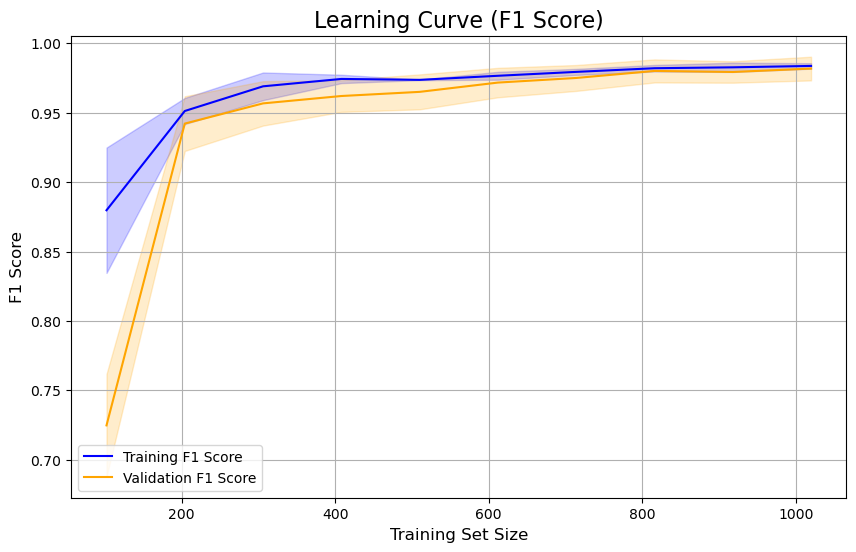

In [45]:
# Learning curve dengan F1 Score
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline_logistic, X_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata dan standar deviasi
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1 Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation F1 Score', color='orange')

# Error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Labels and Title
plt.title('Learning Curve (F1 Score)', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

kedua saya menggunakan algoritma logistic regression untuk menguji sebuah mechine, alhasil yang saya dapatkan yaitu sebagai visualisasi diatas yaitu dengan nilai F1-score 99% untuk training dan test sebesar 97%.

### 3.Suport Vector Machine(SVM)

In [46]:
model_svm = SVC(class_weight='balanced')

In [47]:
final_pipeline_svc = make_pipeline(col_tranform, model_svm)

In [48]:
final_pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('num_transform',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced'))])

In [49]:
# Evaluasi pada data latih
y_train_pred = final_pipeline_svc.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Evaluasi pada data uji
y_test_pred = final_pipeline_svc.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print hasil F1 Score
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Analisis Overfitting/Underfitting
if train_f1 > test_f1 + 0.1:
    print("Model kemungkinan overfitting.")
elif train_f1 < 0.7 and test_f1 < 0.7:
    print("Model kemungkinan underfitting.")
else:
    print("Model memiliki generalisasi yang baik.")


Train F1 Score: 1.00
Test F1 Score: 0.99
Model memiliki generalisasi yang baik.


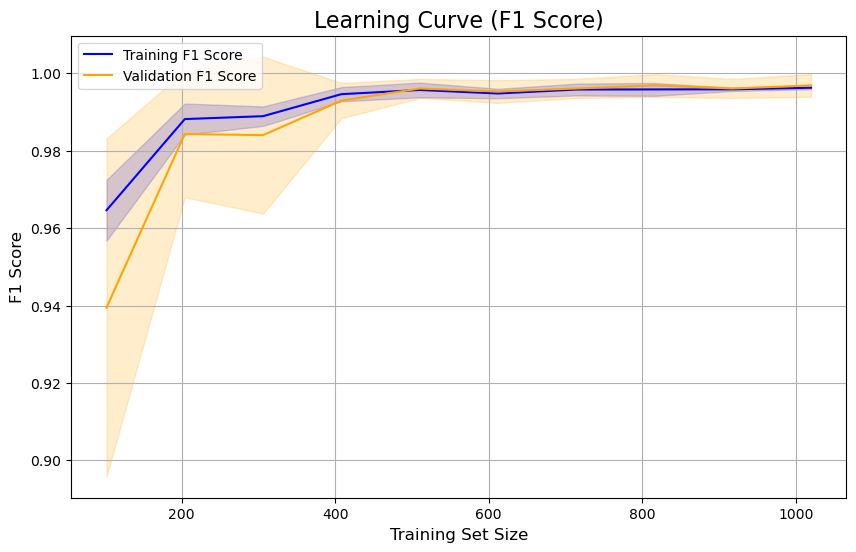

In [50]:
# Learning curve dengan F1 Score
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline_svc, X_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata dan standar deviasi
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1 Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation F1 Score', color='orange')

# Error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Labels and Title
plt.title('Learning Curve (F1 Score)', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

Pertama saya menggunakan algoritma SVM untuk menguji sebuah mechine, alhasil yang saya dapatkan yaitu sebagai visualisasi diatas yaitu dengan nilai F1-score 100% untuk training dan test sebesar 99%.

## 5.Evaluasi

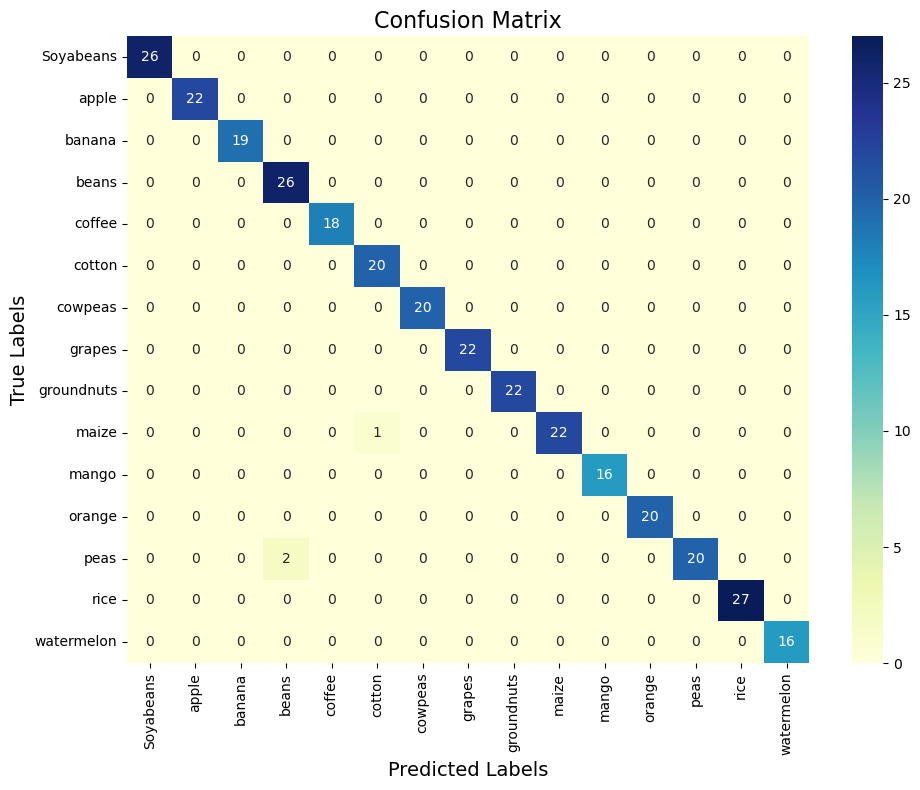

Classification Report model SVM:
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        19
       beans       0.93      1.00      0.96        26
      coffee       1.00      1.00      1.00        18
      cotton       0.95      1.00      0.98        20
     cowpeas       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        23
       mango       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
        peas       1.00      0.91      0.95        22
        rice       1.00      1.00      1.00        27
  watermelon       1.00      1.00      1.00        16

    accuracy                           0.99       319
   macro avg       0.99      0.99      0.99    

In [51]:
# Prediksi model
y_pred = final_pipeline_svc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = final_pipeline_svc.classes_

# Plot heatmap confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.show()

# Cetak classification_report
print("Classification Report model SVM:")
print(classification_report(y_test, y_pred, target_names=classes))

In [52]:
# Store metrics for each model
metrics = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Definisikan model-model yang sudah dilatih
models = {
    "KNN": final_pipeline_knn,  # Ganti dengan model KNN yang sudah dilatih
    "Logistic Regression": final_pipeline_logistic,  # Ganti dengan model Decision Tree yang sudah dilatih
    "SVM": final_pipeline_svc  # Ganti dengan model SVM yang sudah dilatih
}

# Collect metrics
for name, model in models.items():
    y_pred = model.predict(X_test)  # Prediksi pada data uji
    report = classification_report(y_test, y_pred, output_dict=True)  # Mengambil laporan klasifikasi
    metrics["Model"].append(name)
    metrics["Precision"].append(report['weighted avg']['precision'])  # Precision rata-rata berbobot
    metrics["Recall"].append(report['weighted avg']['recall'])  # Recall rata-rata berbobot
    metrics["F1-Score"].append(report['weighted avg']['f1-score'])  # F1-Score rata-rata berbobot

# Convert to DataFrame for better visualization
df_metrics = pd.DataFrame(metrics)

display(df_metrics.sort_values(by='F1-Score', ascending=False).reset_index().drop(columns='index'))

Model  Precision    Recall  F1-Score
0                  SVM   0.991193  0.990596  0.990566
1                  KNN   0.985035  0.984326  0.984198
2  Logistic Regression   0.975987  0.974922  0.974669

setelah malakukan 3 model machine learning dapat dan hasil dari masing masing model, maka peneliti menggunakan model Svm untuk klasifikasi model yang akan untuk memprediksi tumbuhan yang diperlukan sesuai dengan unsur tanah itu sendiri.

In [53]:
# Menyimpan model ke file
joblib.dump(final_pipeline_svc, '../model/model_svm_final.pkl')

['../model/model_svm_final.pkl']

## 6. Kesimpulan

* Model Support Vector Machine (SVM) yang telah dikembangkan menunjukkan hasil yang sangat baik dengan F1-score 99%. Ini menandakan bahwa model ini mampu mengklasifikasikan data dengan sangat baik, terutama dalam menangani ketidakseimbangan antara kelas, yang biasa terjadi pada data pertanian.

Keunggulan Model:

1. F1-Score Tinggi: Dengan F1-score yang mendekati 100%, model ini memiliki kinerja yang sangat baik dalam hal keseimbangan antara precision dan recall, yang sangat penting dalam aplikasi yang melibatkan klasifikasi tumbuhan, di mana kesalahan dalam pemilihan bisa berakibat fatal.
2. Kemampuan Menangani Data Tidak Seimbang: SVM dengan parameter class_weight='balanced' sangat berguna dalam menangani masalah ketidakseimbangan kelas, sehingga membuat model lebih adil dalam memprediksi kelas yang jarang muncul.
3. Akurasi Tinggi: Model ini memberikan akurasi yang tinggi dalam memprediksi tumbuhan yang sesuai dengan kondisi tanah, yang bisa sangat bermanfaat bagi petani dalam memilih tumbuhan yang optimal berdasarkan unsur tanah yang mereka miliki.

Manfaat untuk Petani:

* Model ini berpotensi sangat membantu para petani dalam menentukan jenis tumbuhan yang sesuai dengan kondisi tanah mereka. Misalnya, dengan memasukkan parameter-parameter seperti pH tanah, kelembapan, suhu, dan unsur hara (seperti N, P, dan K), petani dapat dengan cepat mengetahui jenis tumbuhan yang akan tumbuh dengan baik di lingkungan tertentu. Dengan demikian, model ini dapat meningkatkan hasil pertanian, mengurangi pemborosan, dan meningkatkan efisiensi dalam penggunaan sumber daya tanah.

Harapan ke Depan:
 * Dengan hasil yang sangat baik ini, model SVM dapat diintegrasikan dalam aplikasi berbasis web atau mobile yang mudah digunakan oleh petani. Selain itu, dengan penerapan model ini secara lebih luas, diharapkan dapat membantu meningkatkan produktivitas pertanian dan menjaga keberlanjutan pertanian yang ramah lingkungan.

* Secara keseluruhan, model SVM ini dapat menjadi alat yang sangat berguna dalam membantu petani membuat keputusan yang lebih cerdas terkait dengan pemilihan tumbuhan yang sesuai dengan unsur tanah mereka, yang pada gilirannya dapat mendukung peningkatan hasil pertanian yang berkelanjutan.